Importacion del dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


Visualizacion de datos

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

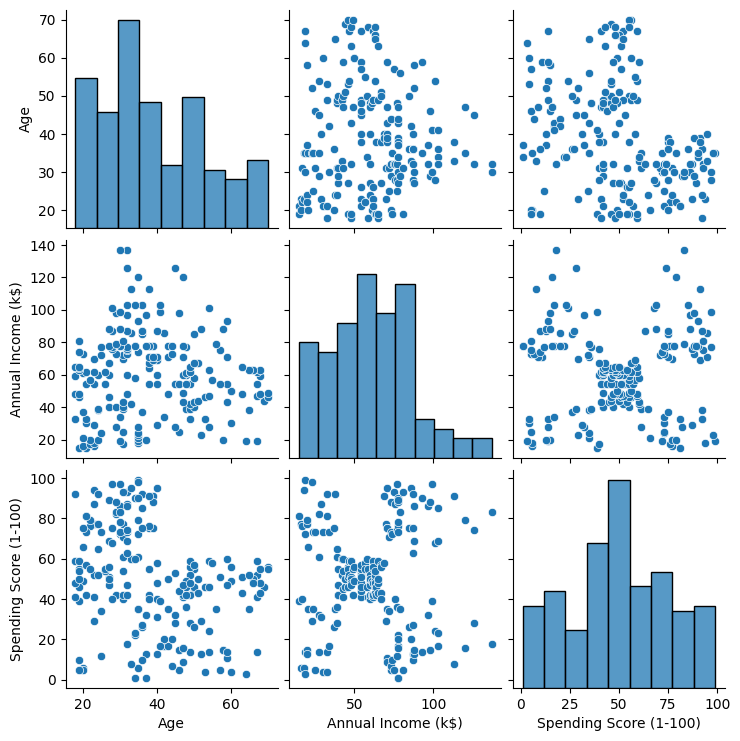

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')

#Cargar dataset

print(df.head())
print(df.describe())
print(df.info())

#Visualizar relaciones
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

Paso 2: Preprocesamiento

In [5]:

#Eliminar columnas irrelevantes
df_clean = df.drop(['CustomerID'], axis=1)

#Convertir genero a valores numericos
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})


Paso 3: Selección de características

In [6]:
X = df_clean[['Annual Income (k$)', 'Spending Score (1-100)']]

Paso 4: Entrenar Hierarchical Clustering

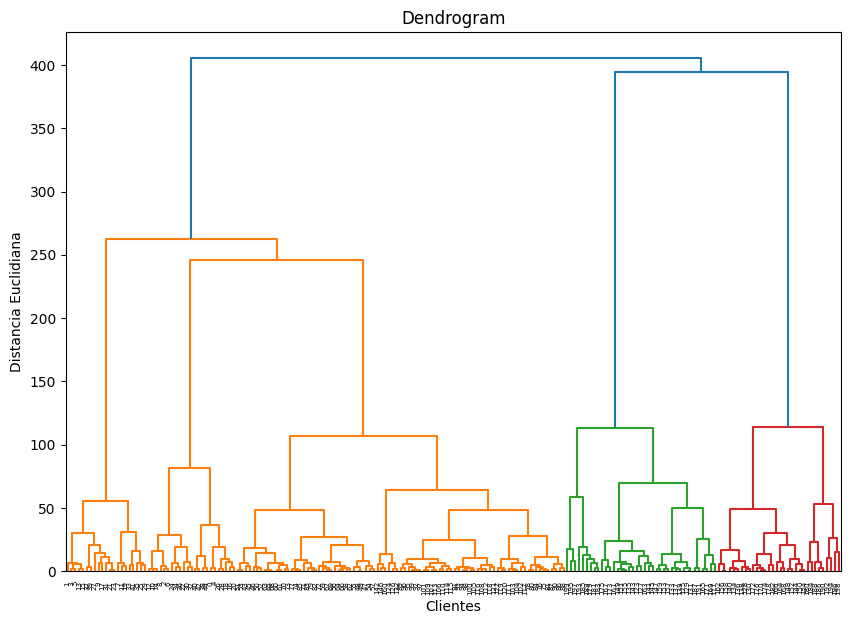

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrograma para determinar el número de clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Entrenar el modelo con 5 clusters
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Añadir resultados al dataframe
df_clean['Cluster'] = y_hc


 Paso 5: Evaluación del modelo

In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print("Silhouette Score:", silhouette_score(X, y_hc))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X, y_hc))


Silhouette Score: 0.5529945955148897
Calinski-Harabasz Index: 243.07142892964563


Paso 6: Visualización de resultados


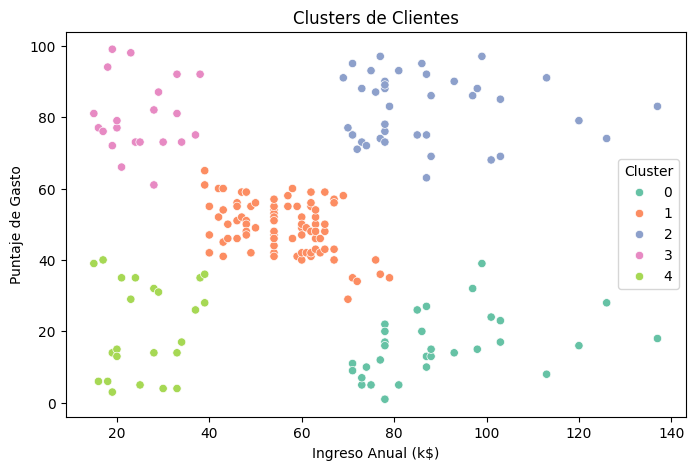

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=y_hc, palette='Set2')
plt.title("Clusters de Clientes")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntaje de Gasto")
plt.legend(title="Cluster")
plt.show()


Paso 7: Interpretacion de resulatados



Se aplicó el algoritmo de Hierarchical Clustering con 5 clusters sobre un subconjunto de variables del dataset Mall_Customers.csv, típicamente Annual Income (ingreso anual) y Spending Score (puntaje de gasto), que son las más relevantes para segmentar a los clientes.

Algunas conclusiones

La segmentacion a los clientes permite entender el comportamiento de compra y adaptar campañas.
Los clientes con alto gasto pero bajo ingreso (Cluster 2) pueden necesitar ofertas y descuentos.
Los clientes con alto ingreso pero bajo gasto (Cluster 3) podrían ser incentivados con membresías premium o fidelización.



In [12]:
from google.colab import files
files.download("hierchical_edison.ipynb")



FileNotFoundError: Cannot find file: hierchical_edison.ipynb